# **K- Means Clustering Algorithm**

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [29]:
dataset = pd.read_csv('clustered dataset.csv')

In [30]:
dataset.head()

,Unnamed: 0,Cluster_numbers,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,3,1,1,19,15,39
1,1,3,2,1,21,15,81
2,2,3,3,0,20,16,6
3,3,3,4,0,23,16,77
4,4,3,5,0,31,17,40


In [31]:
dataset.tail()

,Unnamed: 0,Cluster_numbers,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,195,2,196,0,35,120,79
196,196,0,197,0,45,126,28
197,197,2,198,1,32,126,74
198,198,0,199,1,32,137,18
199,199,2,200,1,30,137,83


In [32]:
dataset['Gender'] = dataset['Gender'].map({'Female': '0', 'Male': '1'})
dataset.head()

,Unnamed: 0,Cluster_numbers,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,3,1,NaN,19,15,39
1,1,3,2,NaN,21,15,81
2,2,3,3,NaN,20,16,6
3,3,3,4,NaN,23,16,77
4,4,3,5,NaN,31,17,40


In [33]:
dataset['Gender'] = dataset['Gender'].fillna(0)


C:\Users\HP\AppData\Local\Temp\ipykernel_7636\161790599.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset['Gender'] = dataset['Gender'].fillna(0)


In [34]:
dataset.shape

(200, 7)

In [35]:
dataset.columns

Index(['Unnamed: 0', 'Cluster_numbers', 'CustomerID', 'Gender', 'Age',
       'Annual Income (k$)', 'Spending Score (1-100)'],
      dtype='object')

In [36]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Unnamed: 0              200 non-null    int64
 1   Cluster_numbers         200 non-null    int64
 2   CustomerID              200 non-null    int64
 3   Gender                  200 non-null    int64
 4   Age                     200 non-null    int64
 5   Annual Income (k$)      200 non-null    int64
 6   Spending Score (1-100)  200 non-null    int64
dtypes: int64(7)
memory usage: 11.1 KB


In [37]:
dataset.select_dtypes(include = ['int64', 'float64']).columns

Index(['Unnamed: 0', 'Cluster_numbers', 'CustomerID', 'Gender', 'Age',
       'Annual Income (k$)', 'Spending Score (1-100)'],
      dtype='object')

In [38]:
dataset.describe()

,Unnamed: 0,Cluster_numbers,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.0,200.000000,200.000000,200.000000
mean,99.500000,2.160000,100.500000,0.0,38.850000,60.560000,50.200000
std,57.879185,1.397917,57.879185,0.0,13.969007,26.264721,25.823522
min,0.000000,0.000000,1.000000,0.0,18.000000,15.000000,1.000000
25%,49.750000,1.000000,50.750000,0.0,28.750000,41.500000,34.750000
50%,99.500000,2.000000,100.500000,0.0,36.000000,61.500000,50.000000
75%,149.250000,3.000000,150.250000,0.0,49.000000,78.000000,73.000000
max,199.000000,4.000000,200.000000,0.0,70.000000,137.000000,99.000000


In [39]:
dataset.isnull().values.any()

np.False_

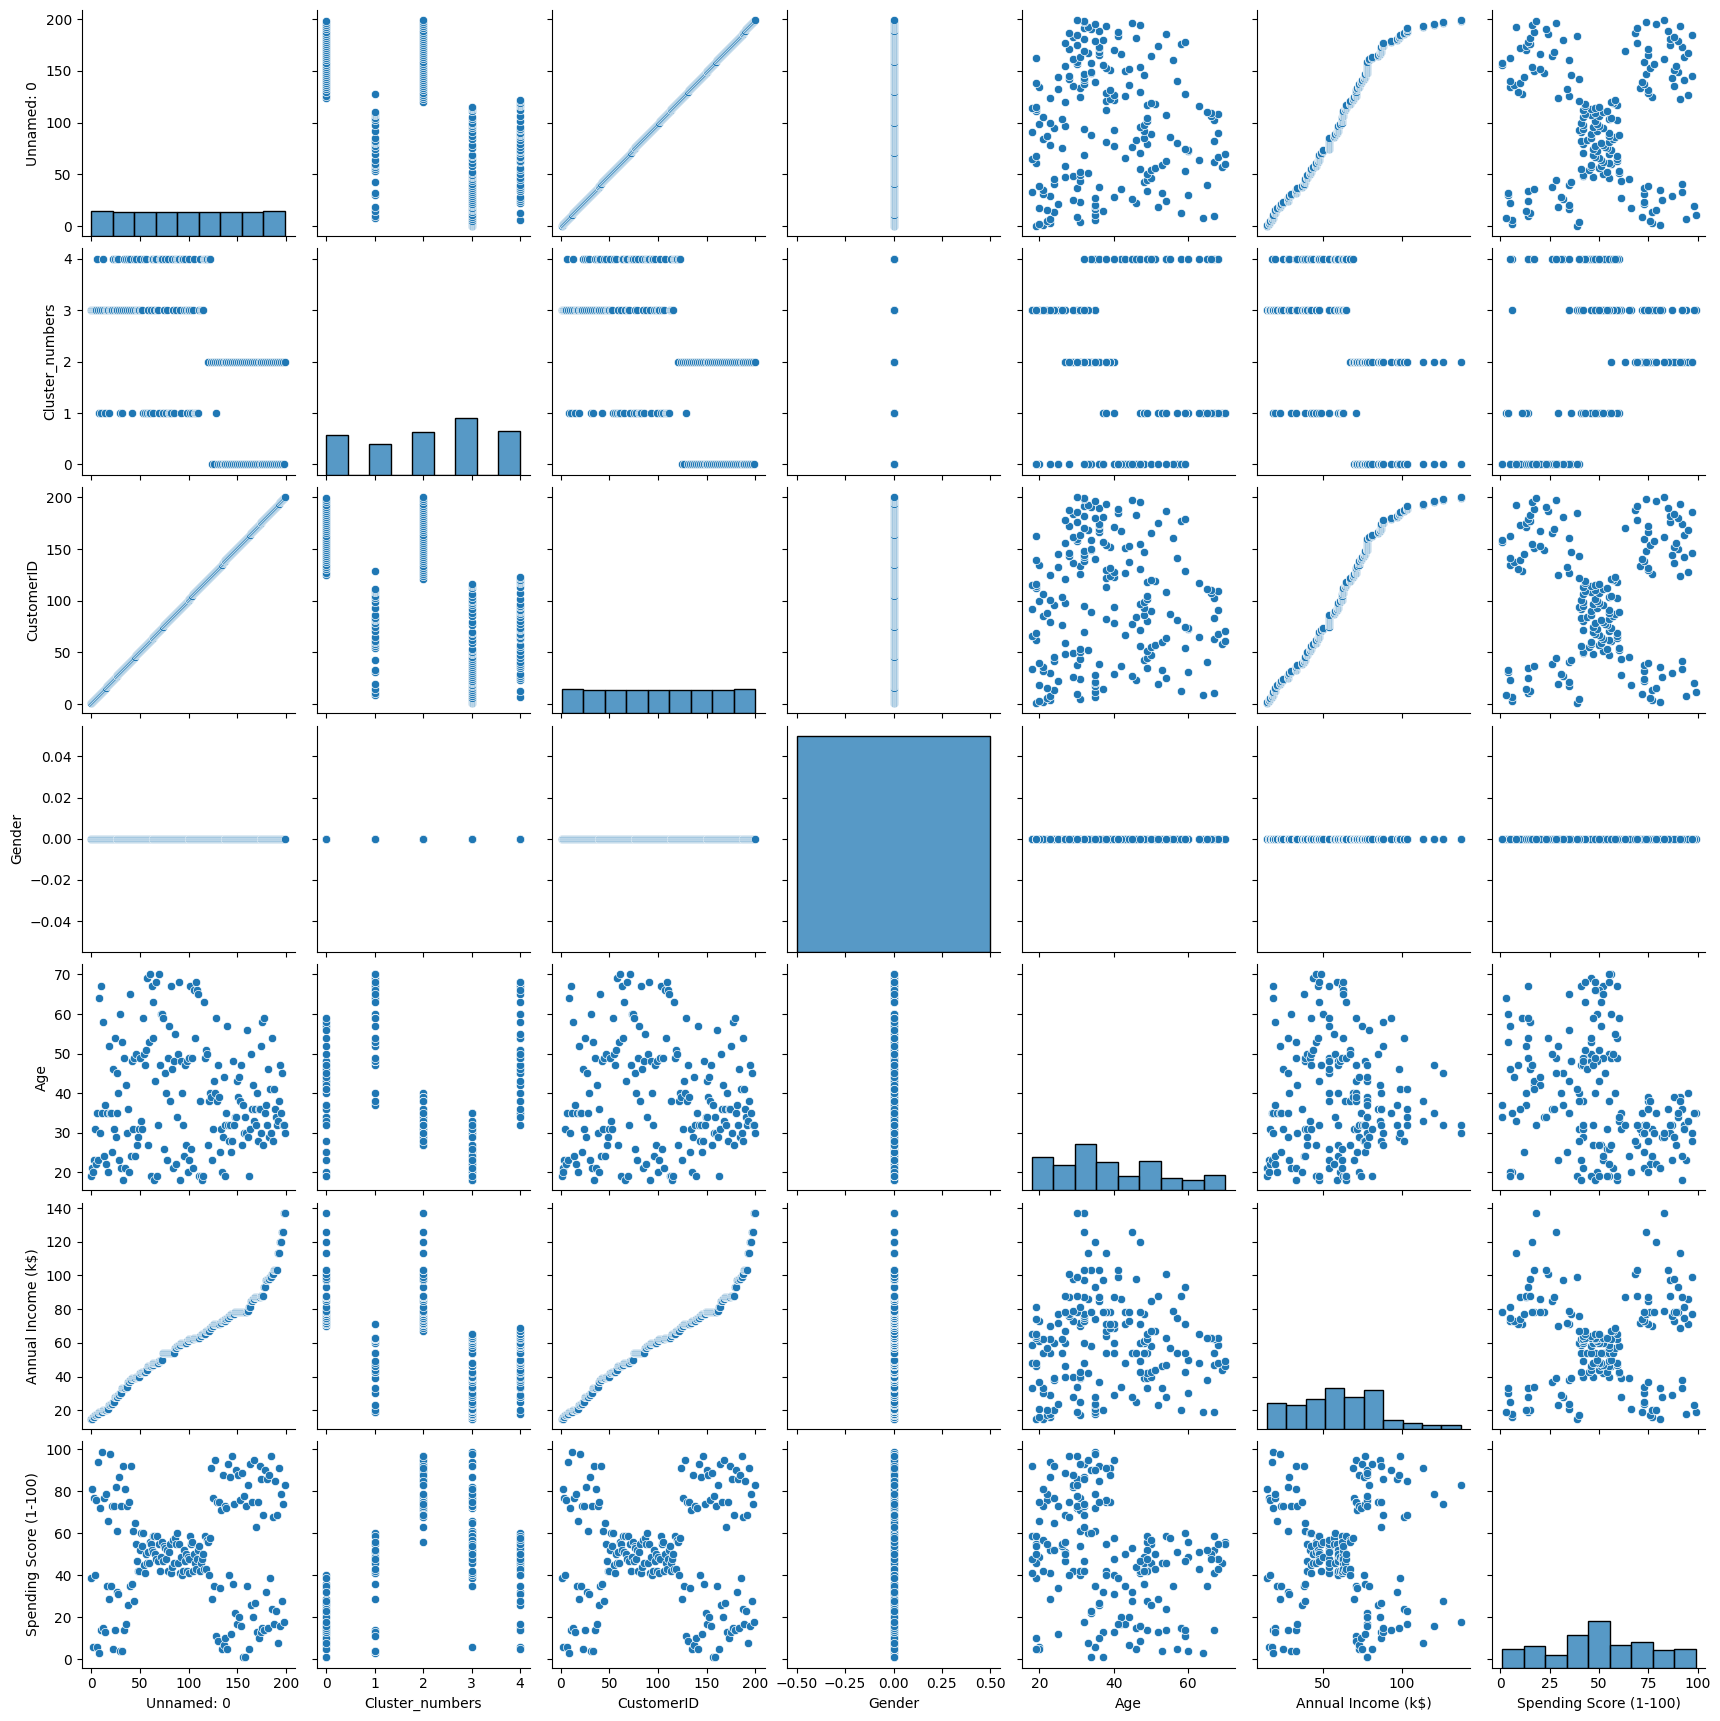

In [40]:
import seaborn as sns
sns.pairplot(dataset)

In [41]:
dataset.head()

,Unnamed: 0,Cluster_numbers,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,3,1,0,19,15,39
1,1,3,2,0,21,15,81
2,2,3,3,0,20,16,6
3,3,3,4,0,23,16,77
4,4,3,5,0,31,17,40


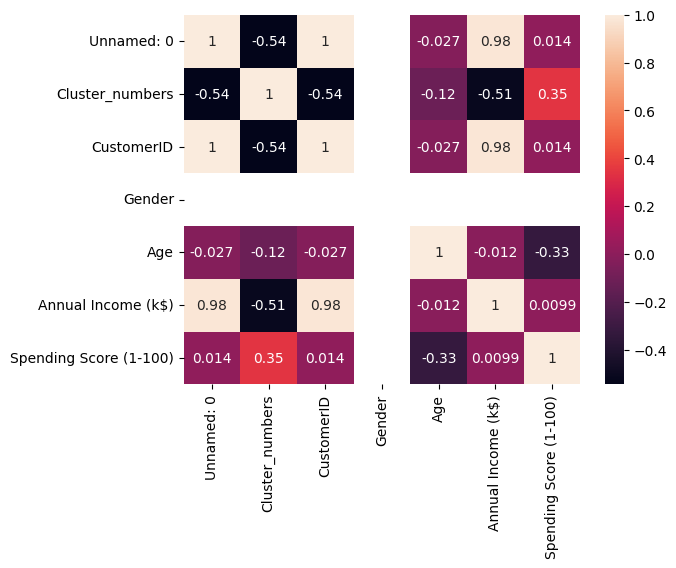

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(dataset.corr(), annot = True)
plt.show()

In [43]:
dataframe = dataset

In [44]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
dataset = sc.fit_transform(dataset)

In [45]:
dataset

array([[-1.7234121 ,  0.6024021 , -1.7234121 , ..., -1.42456879,
        -1.73899919, -0.43480148],
       [-1.70609137,  0.6024021 , -1.70609137, ..., -1.28103541,
        -1.73899919,  1.19570407],
       [-1.68877065,  0.6024021 , -1.68877065, ..., -1.3528021 ,
        -1.70082976, -1.71591298],
       ...,
       [ 1.68877065, -0.11474326,  1.68877065, ..., -0.49160182,
         2.49780745,  0.92395314],
       [ 1.70609137, -1.54903398,  1.70609137, ..., -0.49160182,
         2.91767117, -1.25005425],
       [ 1.7234121 , -0.11474326,  1.7234121 , ..., -0.6351352 ,
         2.91767117,  1.27334719]], shape=(200, 7))

In [46]:
from sklearn.cluster import KMeans

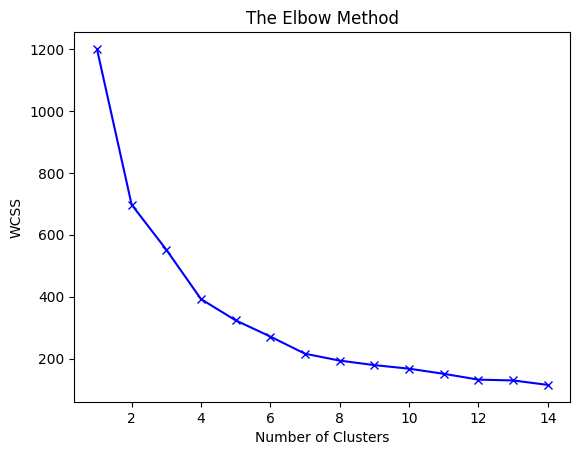

In [47]:
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming 'dataset' is a pandas DataFrame
imputer = SimpleImputer(strategy='mean')
dataset_imputed = imputer.fit_transform(dataset)

wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(dataset_imputed)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 15), wcss, 'bx-')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


In [48]:
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming 'dataset' is a pandas DataFrame or a NumPy array
imputer = SimpleImputer(strategy='mean') # Create an imputer to fill missing values with the mean
dataset_imputed = imputer.fit_transform(dataset) # Impute missing values in the dataset

kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 0)
y_kmeans = kmeans.fit_predict(dataset_imputed) # Fit KMeans

In [49]:
y_kmeans

array([2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4], dtype=int32)

In [50]:
y_kmeans = y_kmeans.reshape(len(y_kmeans), 1)

In [51]:
bx = np.concatenate((y_kmeans, dataframe), axis = 1)

In [52]:
dataframe.columns

Index(['Unnamed: 0', 'Cluster_numbers', 'CustomerID', 'Gender', 'Age',
       'Annual Income (k$)', 'Spending Score (1-100)'],
      dtype='object')

In [53]:
# Assuming 'dataframe' has the columns 'CustomerID', 'Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)' and two more columns
dataframe_final = pd.DataFrame(data = bx, columns = ['Cluster_numbers','CustomerID', 'Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Extra Column 1', 'Extra Column 2'])

In [54]:
dataframe_final.head()

,Cluster_numbers,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Extra Column 1,Extra Column 2
0,2,0,3,1,0,19,15,39
1,2,1,3,2,0,21,15,81
2,2,2,3,3,0,20,16,6
3,2,3,3,4,0,23,16,77
4,2,4,3,5,0,31,17,40
